In [2]:
import pandas as pd
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import matplotlib.pyplot as plt

US = pd.read_csv("USArrests.csv")
US.columns = ['State','Murder','Assault','UrbanPop','Rape']
labelList = US.State.tolist()
US.head()

,State,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


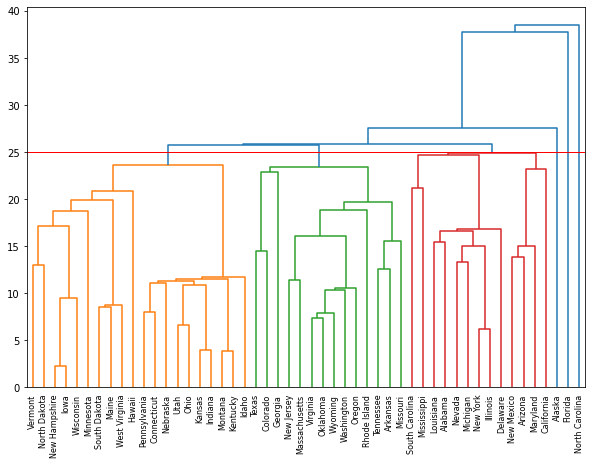

In [3]:
#최단연결법
single = linkage(US.iloc[:,1::], metric='euclidean',method = 'single')

#덴드로그램
plt.figure(figsize=(10,7))
dendrogram(single,orientation='top',
           labels = labelList,
           distance_sort='descending',
           color_threshold=25, #군집의 수르 설정하는 height값 설정
           show_leaf_counts=True)

plt.axhline(y=25, color = 'r', linewidth=1)
plt.show()

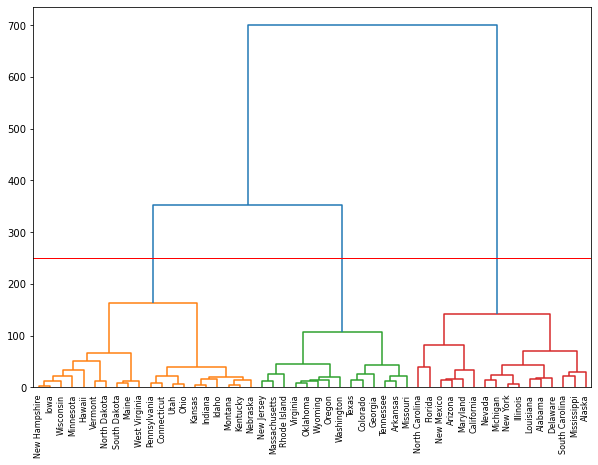

In [5]:
#와드 연결법
ward = linkage(US.iloc[:,1::], 
               metric='euclidean',
               method='ward')
plt.figure(figsize=(10,7))

dendrogram(ward,
           orientation='top',
           labels = labelList,
           distance_sort='descending',
           color_threshold=250,
           show_leaf_counts=True)

#Height값에 따라 선을그어 적절한 군집수 설정
plt.axhline(y=250, color='r', linewidth=1)
plt.show()

In [6]:
#state마다 어떤 군집에 설정되었는지 확인
assignments = fcluster(ward, 250, 'distance')
assignments

array([1, 1, 1, 2, 1, 2, 3, 1, 1, 2, 3, 3, 1, 3, 3, 3, 3, 1, 3, 1, 2, 1,
       3, 1, 2, 3, 3, 1, 3, 2, 1, 1, 1, 3, 3, 2, 2, 3, 2, 1, 3, 2, 2, 3,
       3, 2, 2, 3, 3, 2], dtype=int32)

In [7]:
US['cluster'] = assignments
US.groupby('cluster').mean()

,Murder,Assault,UrbanPop,Rape
cluster,,,,
1,11.812500,272.562500,68.312500,28.375000
2,8.214286,173.285714,70.642857,22.842857
3,4.270000,87.550000,59.750000,14.390000
